In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

In [4]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [5]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [6]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [7]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Weak magnetism

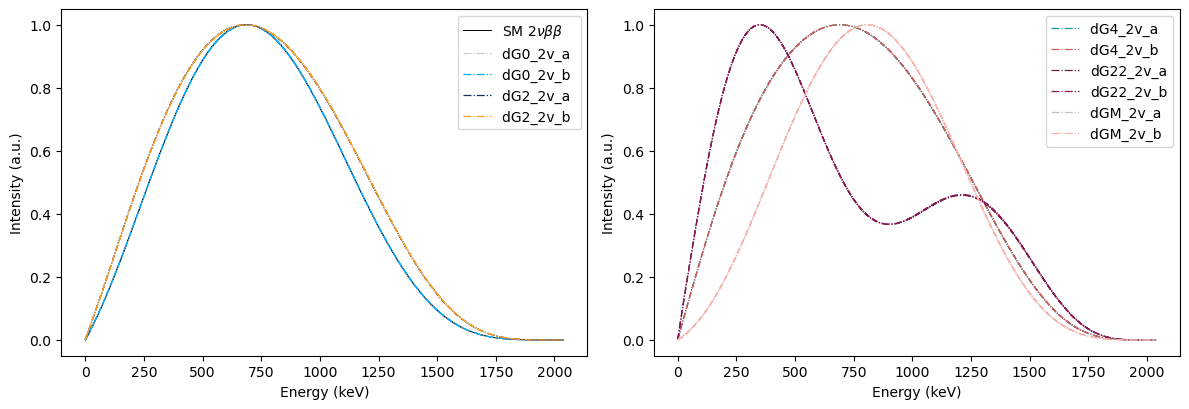

In [8]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/Tables_Emanuele/'

dG0_2v_a  = np.loadtxt(data_path + 'dG0_2ν_a.dat',  usecols=(1), unpack=True)
dG0_2v_b  = np.loadtxt(data_path + 'dG0_2ν_b.dat',  usecols=(1), unpack=True)
dG2_2v_a  = np.loadtxt(data_path + 'dG2_2ν_a.dat',  usecols=(1), unpack=True)
dG2_2v_b  = np.loadtxt(data_path + 'dG2_2ν_b.dat',  usecols=(1), unpack=True)
dG4_2v_a  = np.loadtxt(data_path + 'dG4_2ν_a.dat',  usecols=(1), unpack=True)
dG4_2v_b  = np.loadtxt(data_path + 'dG4_2ν_b.dat',  usecols=(1), unpack=True)
dG22_2v_a = np.loadtxt(data_path + 'dG22_2ν_a.dat', usecols=(1), unpack=True)
dG22_2v_b = np.loadtxt(data_path + 'dG22_2ν_b.dat', usecols=(1), unpack=True)
dGM_2v_a  = np.loadtxt(data_path + 'dGM_2ν_a.dat',  usecols=(1), unpack=True)
dGM_2v_b  = np.loadtxt(data_path + 'dGM_2ν_b.dat',  usecols=(1), unpack=True)


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4.2))
ax0.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-',label=r'SM 2$\nu\beta\beta$')
ax0.step(bins, dG0_2v_a /np.max(dG0_2v_a ), c=cols[0], lw=0.9, ls='-.', label='dG0_2v_a ')
ax0.step(bins, dG0_2v_b /np.max(dG0_2v_b ), c=cols[1], lw=0.9, ls='-.', label='dG0_2v_b ')
ax0.step(bins, dG2_2v_a /np.max(dG2_2v_a ), c=cols[2], lw=0.9, ls='-.', label='dG2_2v_a ')
ax0.step(bins, dG2_2v_b /np.max(dG2_2v_b ), c=cols[3], lw=0.9, ls='-.', label='dG2_2v_b ')
ax1.step(bins, dG4_2v_a /np.max(dG4_2v_a ), c=cols[4], lw=0.9, ls='-.', label='dG4_2v_a ')
ax1.step(bins, dG4_2v_b /np.max(dG4_2v_b ), c=cols[5], lw=0.9, ls='-.', label='dG4_2v_b ')
ax1.step(bins, dG22_2v_a/np.max(dG22_2v_a), c=cols[6], lw=0.9, ls='-.', label='dG22_2v_a')
ax1.step(bins, dG22_2v_b/np.max(dG22_2v_b), c=cols[7], lw=0.9, ls='-.', label='dG22_2v_b')
ax1.step(bins, dGM_2v_a /np.max(dGM_2v_a ), c=cols[8], lw=0.9, ls='-.', label='dGM_2v_a ')
ax1.step(bins, dGM_2v_b /np.max(dGM_2v_b ), c=cols[9], lw=0.9, ls='-.', label='dGM_2v_b ')
ax0.set_xlabel('Energy (keV)')
ax0.set_ylabel('Intensity (a.u.)')
ax1.set_xlabel('Energy (keV)')
ax1.set_ylabel('Intensity (a.u.)')
ax0.legend()
ax1.legend()
#plt.suptitle('Weak magnetism processes')
plt.tight_layout()
#fig.savefig('./images/standard_majoron_spectra.pdf', bbox_inches = 'tight')
plt.show()

# Sensitivity:

### L200 background data

In [9]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

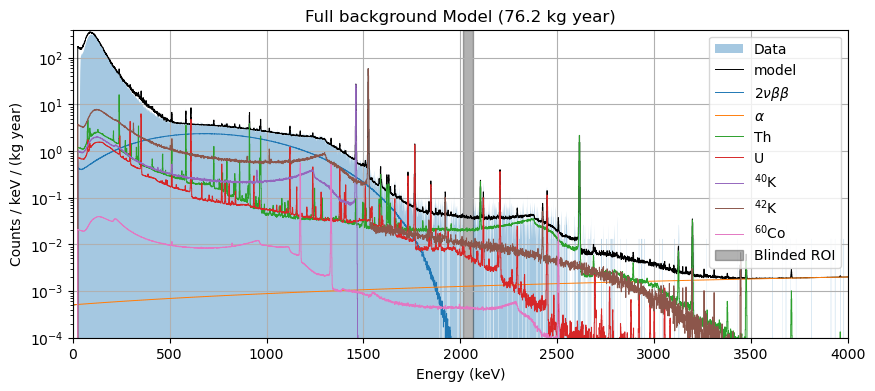

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

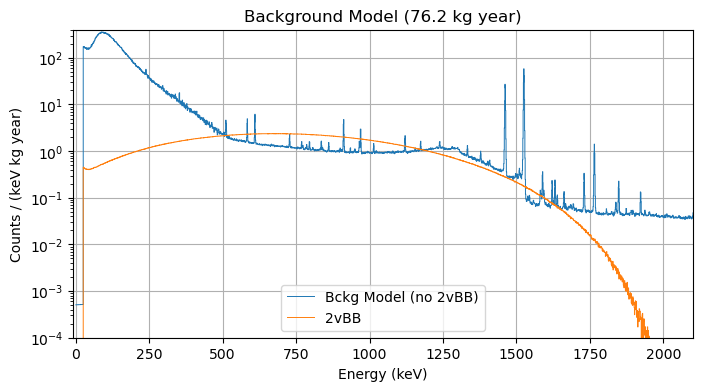

In [11]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Weak magnetism

In [45]:
def diff_decay_rate_low_order(xi_31):
    return dG0_2v_a + dG2_2v_a * xi_31

def diff_decay_rate(xi_31, xi_51=np.array([0]), wm=0):
    return dG0_2v_a + dG2_2v_a * xi_31 + dG4_2v_a*((xi_51+xi_31**2)/3) + dG22_2v_a * (xi_31**2)/3 + dGM_2v_a*wm

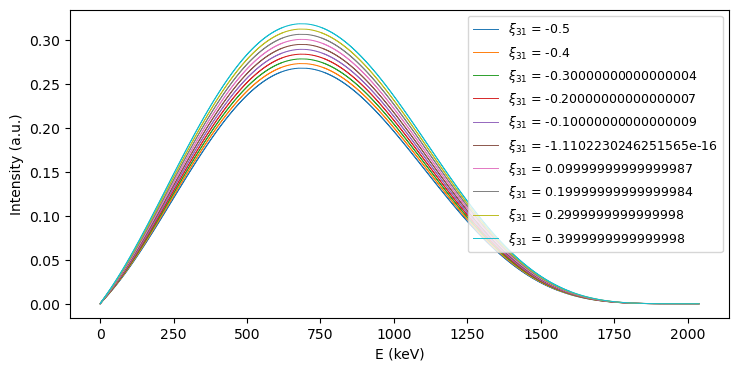

In [32]:
xi_31_vals   = np.arange(-0.5, 0.5, 0.1)
fig, ax = plt.subplots(figsize=(8.5, 4))
for idx, xi_31_v in enumerate(xi_31_vals):
    ax.step(bins, diff_decay_rate(xi_31_v), lw=0.7, ls='-', label=r'$\xi_{31}$ ='+f' {xi_31_v}')
#ax.set_xlim(30, 2010)
#ax.set_ylim(0.99, 1.01)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.legend(fontsize=9)
plt.show()

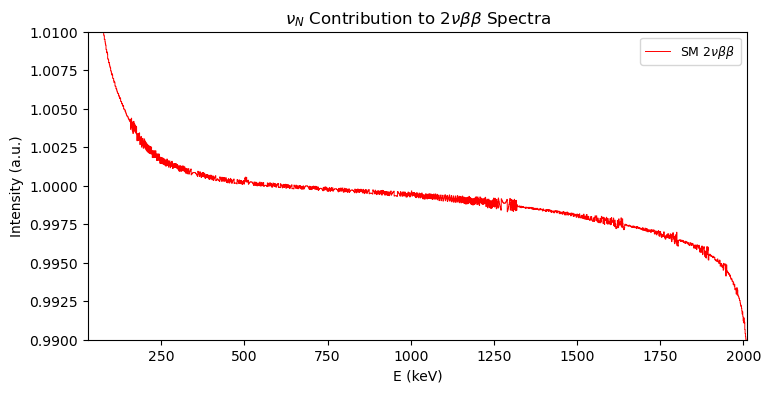

In [13]:
base_spec = diff_decay_rate(0)
base_spec_dist = base_spec / np.sum(base_spec)
fig, ax = plt.subplots(figsize=(8.5, 4))
#ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist),     c='r', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')
#ax.step(bins, base_spec_dist/np.max(base_spec_dist), c='k', lw=0.7, ls='-', label=r'xi_31=0, xi_51=0')
ax.step(bins, (base_spec_dist/np.max(base_spec_dist))/(sm_2nbb_dist/np.max(sm_2nbb_dist)), c='r', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')
ax.set_xlim(30, 2010)
ax.set_ylim(0.99, 1.01)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'$\nu_N$ Contribution to 2$\nu\beta\beta$ Spectra')
ax.legend(fontsize=9)
plt.show()

In [37]:
xi_31_vals   = np.arange(-0.5, 0.5, 0.1)
signal_dist  = []
norm_xi_31_0 = []

for idx, xi_51_v in enumerate(xi_31_vals):
    sdist = diff_decay_rate(xi_31_v)
    sdist = np.insert(sdist, 0, 0, axis=0)
    signal_dist .append(sdist / np.sum(sdist))
    norm_xi_31_0.append(np.sum(sdist) / np.sum(diff_decay_rate_low_order(0)))

In [47]:
def diff_decay_rate_term_SM():
    return dG0_2v_a * np.sum(dG0_2v_a)/np.sum(dG0_2v_a)

def diff_decay_rate_term1(xi_31):
    return dG2_2v_a * xi_31 * np.sum(dG2_2v_a * xi_31)/np.sum(dG0_2v_a)

def diff_decay_rate_term2_a(xi_31):
    return dG4_2v_a*((xi_31**2)/3) * np.sum(dG4_2v_a*((xi_31**2)/3))/np.sum(dG0_2v_a)

def diff_decay_rate_term2_b(xi_51):
    return dG4_2v_a*(xi_51/3) * np.sum(dG4_2v_a*(xi_51/3))/np.sum(dG0_2v_a)

def diff_decay_rate_term3(xi_31):
    return dG22_2v_a * (xi_31**2)/3 * np.sum(dG22_2v_a * (xi_31**2)/3)/np.sum(dG0_2v_a)

def diff_decay_rate_term4(wm=0):
    return dGM_2v_a*wm * np.sum(dGM_2v_a*wm)/np.sum(dG0_2v_a)

In [49]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin =   30 ## The spectra don't start in 0
max_bin = 2010 ## Due to the blind region

# Cut the distribution in the fit range
limits  = (min_bin, max_bin+1)
binning = max_bin + 1 - min_bin

labels       = ['xi31_' + str(xi31_val) for xi31_val in xi_31_vals]
labels_fancy = labels

#xi_51_vals = np.arange(-0.5, 0.5, 0.1)

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of bckg and 2vBB events
exposure = L200_data_exposure
Nbckg    = exposure * np.sum(bckg_model_fitrange)
NvvBB    = exposure * np.sum(vvBB_model_fitrange)

# ===========================================================================

# Setup zfit values. zfit will use this space for defining the probability density functions (PDFs) for the fit
obs = zfit.Space('E', limits=limits, binning=binning)

obs    = zfit.Space('E', limits=limits, binning=binning)
n_vvBB = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)
n_bckg = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)

#This creates a zfit.pdf.HistogramPDF object, which represents a probability density function (PDF) for the background model, using the background data (bckg_model_fitrange) in the defined space (obs). The extended=n_bckg part means that the PDF is extended to model a number of events (rather than just a shape).
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

# How many 2vBB events there would be at 0 xi_31
n_vvBB_xi_31_0 = zfit.Parameter('n_vvBB_xi_31_0', NvvBB, lower=0, step_size=0.01)
xi_31          = zfit.Parameter(         'xi_31',     0, lower=0, step_size=0.01)

# Setup vvBB distribution with calculated counts
n_vvBB   = zfit.ComposedParameter('n_vvBB', diff_decay_rate_term_SM, params=[])
vvBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

ValueError: Dimensions must be equal, but are 1981 and 2040 for '{{node mul}} = Mul[T=DT_DOUBLE](truediv, mul/add_4)' with input shapes: [1981], [2040].

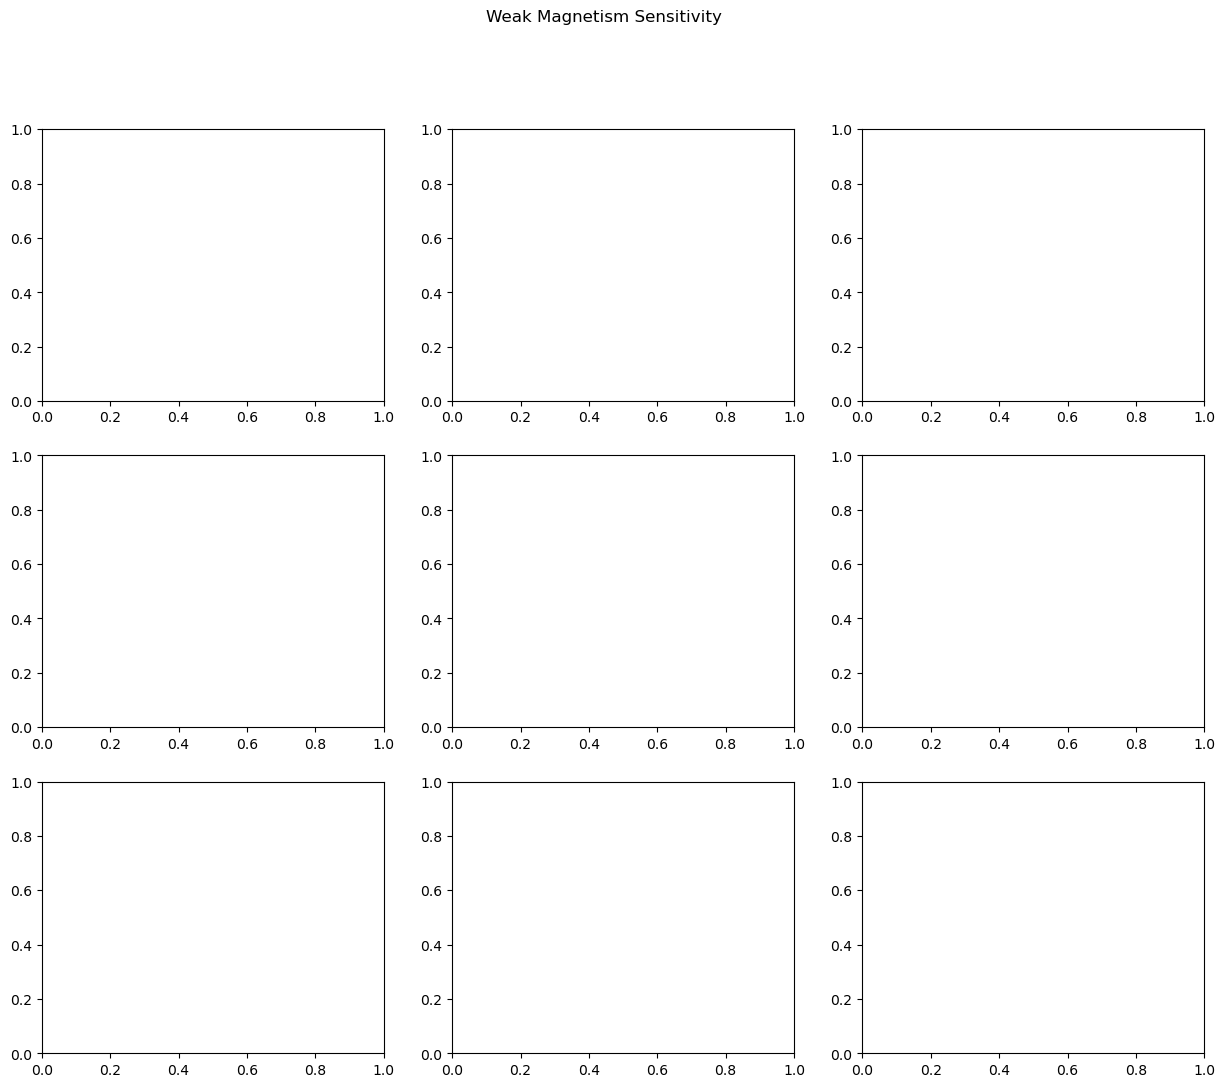

In [44]:
# Prepare combined graph
n_rows      = 3
n_columns   = len(signal_dist) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 12))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Weak Magnetism Sensitivity')

all_xi_31 = []
for idx, (lab, lab_fancy, sig_dist, xi_51_v) in enumerate(zip(labels, labels_fancy, signal_dist, xi_51_vals)):

    sig_dist_fitrange = sig_dist[min_bin:max_bin + 1]
    part_spec_sig_rat = norm_x1_31 * np.sum(sig_dist_fitrange)
    
    n_vvBB_xi31   = zfit.ComposedParameter('n_vvBB_term1', diff_decay_rate_term1, params=[xi_31])
    vvBB_xi31_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_vvBB_xi31)
    
    # Model (vvBB_xi31, vvBB + background)
    model = zfit.pdf.BinnedSumPDF([vvBB_xi31_pdf, vvBB_pdf, bckg_model_pdf])

    xi_31_0       .set_value(0)
    n_vvBB_xi_31_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_bckg > 0
    xi_31_0       .set_value(0.001)
    n_vvBB_xi_31_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)
    
    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    xi_31_hypot_vals = xi_31_vals #np.linspace(xi_31_v / 100., xi_31_v, 200)
    
    poialt   = POI(xi_31_0, 0) # Background only
    poinull  = POIarray(xi_31_0, xi_31_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=False)
    
    #xi_31_sens = find_zero_crossing(xi_31_hypot_vals, expected[0] - alpha)[0]
    #all_xi_31.append(xi_31_sens)

    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(xi_31_hypot_vals, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(xi_31_hypot_vals, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(xi_31_hypot_vals, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha,         lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
        #ax.axvline(xi_31_sens, lw=2, ls='dashdot', color='black', label=r'sin$^2(\theta)$ = ' + sci_notation(xi_31_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'sin$^2(\theta)$')
        ax.set_ylabel('p-value')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/sterile_' + lab + '.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/sterile_combined.pdf', bbox_inches='tight')
plt.show()

In [42]:
find_zero_crossing(xi_31_hypot_vals, expected[0] - alpha)

ValueError: Error on input data

In [18]:
xi_31_hypot_vals

array([-0.005     , -0.00748744, -0.00997487, -0.01246231, -0.01494975,
       -0.01743719, -0.01992462, -0.02241206, -0.0248995 , -0.02738693,
       -0.02987437, -0.03236181, -0.03484925, -0.03733668, -0.03982412,
       -0.04231156, -0.04479899, -0.04728643, -0.04977387, -0.05226131,
       -0.05474874, -0.05723618, -0.05972362, -0.06221106, -0.06469849,
       -0.06718593, -0.06967337, -0.0721608 , -0.07464824, -0.07713568,
       -0.07962312, -0.08211055, -0.08459799, -0.08708543, -0.08957286,
       -0.0920603 , -0.09454774, -0.09703518, -0.09952261, -0.10201005,
       -0.10449749, -0.10698492, -0.10947236, -0.1119598 , -0.11444724,
       -0.11693467, -0.11942211, -0.12190955, -0.12439698, -0.12688442,
       -0.12937186, -0.1318593 , -0.13434673, -0.13683417, -0.13932161,
       -0.14180905, -0.14429648, -0.14678392, -0.14927136, -0.15175879,
       -0.15424623, -0.15673367, -0.15922111, -0.16170854, -0.16419598,
       -0.16668342, -0.16917085, -0.17165829, -0.17414573, -0.17

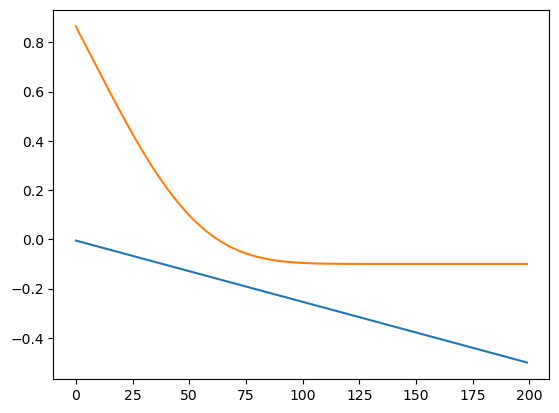

In [43]:
plt.plot(xi_31_hypot_vals)
plt.plot(expected[0] - alpha)

In [43]:
find_zero_crossing(xi_31_hypot_vals, expected[0] - alpha)

ValueError: Error on input data

In [45]:
xi_31_hypot_vals

array([-0.005     , -0.00748744, -0.00997487, -0.01246231, -0.01494975,
       -0.01743719, -0.01992462, -0.02241206, -0.0248995 , -0.02738693,
       -0.02987437, -0.03236181, -0.03484925, -0.03733668, -0.03982412,
       -0.04231156, -0.04479899, -0.04728643, -0.04977387, -0.05226131,
       -0.05474874, -0.05723618, -0.05972362, -0.06221106, -0.06469849,
       -0.06718593, -0.06967337, -0.0721608 , -0.07464824, -0.07713568,
       -0.07962312, -0.08211055, -0.08459799, -0.08708543, -0.08957286,
       -0.0920603 , -0.09454774, -0.09703518, -0.09952261, -0.10201005,
       -0.10449749, -0.10698492, -0.10947236, -0.1119598 , -0.11444724,
       -0.11693467, -0.11942211, -0.12190955, -0.12439698, -0.12688442,
       -0.12937186, -0.1318593 , -0.13434673, -0.13683417, -0.13932161,
       -0.14180905, -0.14429648, -0.14678392, -0.14927136, -0.15175879,
       -0.15424623, -0.15673367, -0.15922111, -0.16170854, -0.16419598,
       -0.16668342, -0.16917085, -0.17165829, -0.17414573, -0.17

Using background model: 


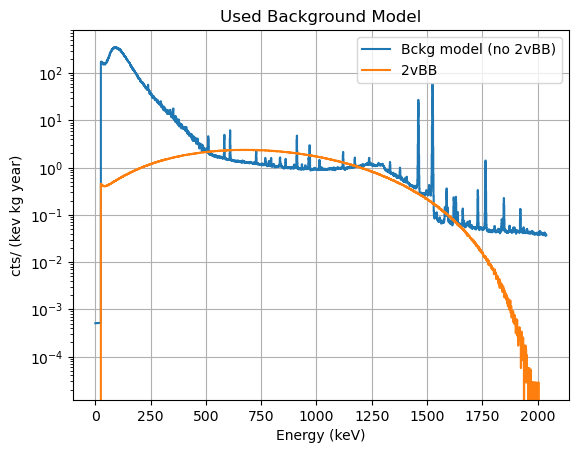

In [16]:
print('Using background model: ')
fig, ax = plt.subplots()
ax.step(bins, bckg_model[:len(bins)], where='post', label='Bckg model (no 2vBB)')
ax.step(bins, vvBB_model[:len(bins)], where='post', label='2vBB')
ax.set_title('Used Background Model')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('cts/ (kev kg year)')
ax.grid()
ax.set_yscale('log')
ax.legend()
plt.show()

### Save data

In [17]:
actually_fit_masses = list(np.array(sterile_masses_keV)    [np.array(all_sin_theta_sq_sens0) != np.array(None)])
actually_calc_sens  = list(np.array(all_sin_theta_sq_sens0)[np.array(all_sin_theta_sq_sens0) != np.array(None)])

### Save computed data
#filename = f'./results/sensitivity_sterile_LEGEND200_fit_{min_bin}_{max_bin}.npz'
#np.savez(filename, masses=actually_fit_masses, sensitivity=actually_calc_sens)

## Exclusion plotting

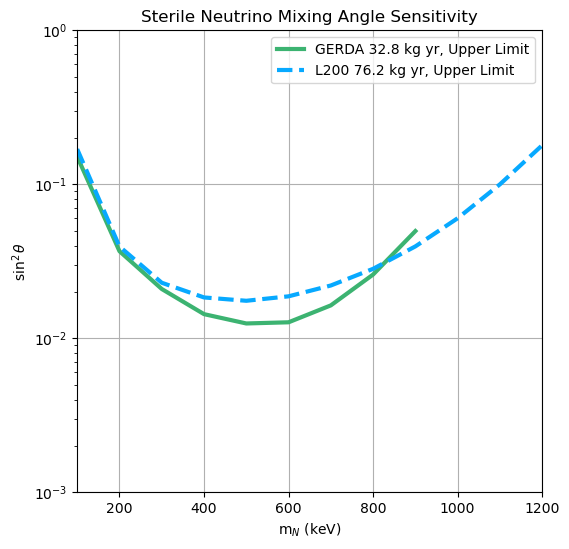

In [18]:
c_gerda   = 'mediumseagreen'
c_legend1 = '#07A9FF'
c_legend2 = '#1A2A5B'

fig, ax = plt.subplots(figsize=(6,6))

#GERDA 32.8 kg yr
data_sterile_gerda   = np.load(basepath+'/results/results_gerda2022_sterile_all.npz')
masses_sterile_gerda = data_sterile_gerda['masses']
limits_sterile_gerda = data_sterile_gerda['limits']

#LEGEND 200
min_bin0 = 30
max_bin0 = 2010
data_sterile_l200        = np.load(f'./results/sensitivity_sterile_LEGEND200_fit_{min_bin}_{max_bin}.npz')
masses_sterile_l200      = data_sterile_l200['masses']
sensitivity_sterile_l200 = data_sterile_l200['sensitivity']

ax.plot(masses_sterile_gerda, limits_sterile_gerda,     label='GERDA 32.8 kg yr, Upper Limit', lw=3, color=c_gerda)
ax.plot(masses_sterile_l200 , sensitivity_sterile_l200, label=f'L200 {L200_data_exposure} kg yr, Upper Limit', lw=3, color = c_legend1, ls='dashed')

ax.set_yscale('log')
ax.set_xlim(100,1200)
#ax.set_ylim(3e-4,0.5)
ax.set_ylim(1e-3, 1)
ax.set_xlabel(r'm$_N$ (keV)')
ax.set_ylabel(r'$\sin^2\theta$')
ax.set_title('Sterile Neutrino Mixing Angle Sensitivity')
ax.grid()
ax.legend()
#plt.savefig('./images/sterile-neutrino_sensitivity_comparison_GERDA.pdf', bbox_inches='tight')
plt.show()

## Test:

In [ ]:
# Read in spectra
lv_dist             = np.loadtxt(basepath + 'dist/lorentz/LV_76Ge_spectra.dat', usecols=(2), unpack=True)
lv_dist             = np.insert(lv_dist, 0, 0, axis=0)
lv_dist_phasesp_int = np.sum(lv_dist) * 402.701 # Data file tells us to multiply by 402.701 to get G in units of 10^-21 y^-1 MeV^-1.
lv_dist             = lv_dist / np.sum(lv_dist) # Normalize to area = 1


xi_31_vals   = np.arange(-0.5, 0.5, 0.1)
signal_dist  = []
norm_xi_31_0 = []

for idx, xi_31_v in enumerate(xi_31_vals):
    sdist = diff_decay_rate_low_order(xi_31_v)
    sdist = np.insert(sdist, 0, 0, axis=0)
    signal_dist .append(sdist / np.sum(sdist))
    norm_xi_31_0.append(np.sum(sdist) / np.sum(diff_decay_rate_low_order(0)))
    

# Significance Level
alpha = 0.1

exposure = L200_data_exposure

min_bin = 30
max_bin = 2010

# Range of values to construct CI over
xi_31_min = -0.5
xi_31_max =  0.5

# ===========================================================================

# Cut the distribution in the fit range
limits              = (min_bin, max_bin + 1)
binning             = max_bin + 1 - min_bin
bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]
lv_dist_fitrange    = lv_dist   [min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

# Setup zfit values
obs    = zfit.Space('E', limits=limits, binning=binning)
n_vvBB = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)
n_bckg = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)

def product(a, b):
    return a * b

LV_ratio = zfit.Parameter('LV_ratio', 0, lower = 1.5 * xi_31_min, upper = 1.5 * xi_31_max, step_size=0.01)
n_LV     = zfit.ComposedParameter('n_LV', product, params=[LV_ratio, n_vvBB])

vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)
lv_pdf         = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=lv_dist_fitrange), extended=n_LV)
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

model = zfit.pdf.BinnedSumPDF([lv_pdf, vvBB_pdf, bckg_model_pdf])

# 0 means "no perturbation"
LV_ratio.set_value(0)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

# In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
# After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
# I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
# zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
# In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
# as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
# nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

# Perturb n_signal away from 0 to get out of a local minimum at 0
# Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
# This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
LV_ratio.set_value(xi_31_min/10)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

# https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
LV_ratio_hypot_vals = np.linspace(xi_31_min, xi_31_max, 200)
poialt  = POI(LV_ratio, 0) # Background only
poinull = POIarray(LV_ratio, LV_ratio_hypot_vals) # Background + signal

# oneSided=True gives correct p-values from hepstats
# onesidedDiscovery will work when poialt > poinull
# onesided will work when poinull > poialt
# Get both results and combine into full p-value plot
expectedLeft  = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=True)
expectedRight = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=False)

# Where default (incorrect) output is given, use the correct results expected p-value array
expected = np.where(expectedLeft[0] == 5e-1, expectedRight, expectedLeft)

# Data file tells us to multiply by 48.122 to get G in units of 10^-21 y^-1.
nnbb_ref_phasesp_int = np.sum(lv_dist) * 48.122 
# Calculate phase space ratio and convert to units of GeV
full_spec_phasesp_ratio_MeV = nnbb_ref_phasesp_int / lv_dist_phasesp_int
full_spec_phasesp_ratio_GeV = full_spec_phasesp_ratio_MeV * 1e-3

aof = LV_ratio_hypot_vals * full_spec_phasesp_ratio_GeV
# Calculate sensitivity
aof_sens       = find_zero_crossing(aof, expected[0] - alpha)
aof_sens_left  = aof_sens[0]
aof_sens_right = aof_sens[1]

sens_label = sci_notation(aof_sens_left, precision=2, decimal_digits=2) + r'< $\mathring{a}_{of}^{(3)}$ < ' + sci_notation(aof_sens_right, precision=2, decimal_digits=2)

fig, ax = plt.subplots()
ax.fill_between(aof, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(aof, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(aof, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(aof_sens_left,  lw=2, ls='dashdot', color='black', label=sens_label)
ax.axvline(aof_sens_right, lw=2, ls='dashdot', color='black')
set_border_line_width(ax, 1.5)
ax.set_title('Lorentz Violation Sensitivity')
ax.set_xlabel(r'$\mathring{a}_{of}^{(3)}$ (GeV)')
ax.set_ylabel('p-value')
#ax.set_xlim(min(aof), max(aof))
ax.set_xlim(-1e-8, 1e-8)
ax.set_ylim(1e-8, 1)
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.grid()
#fig.savefig('./images/lorentz_violation_aof.pdf', bbox_inches='tight')
plt.show()